In [121]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
import math

%matplotlib inline

In [122]:
LAT_TO_M = 111176.46161222676
LONG_TO_M = 75643.46720256942

In [123]:
df = pd.read_csv('towork1.csv')

In [124]:
df['dt'] = [datetime.datetime.fromtimestamp(x/1000) for x in df['timestamp'].values]
df['Ddt'] = df.diff()['dt']
df['Dlat'] = df.diff()['lat']
df['Dlong'] = df.diff()['long']

df['Dlat'] = df['Dlat'] * LAT_TO_M
df['Dlong'] = df['Dlong'] * LONG_TO_M
df['d_euc'] = [math.sqrt(a**2 + b**2) for (a, b) in zip(df['Dlat'].values, df['Dlong'].values)]



In [125]:
df['Ddt'][0] = 1
df['d_euc'][0] = 0
df['speed'] = [(d / (int(t) / 1000 / 1000 / 1000)) for (d, t) in zip(df['d_euc'].values, df['Ddt'].values)]
df['speed'] = df['speed'] * 3.6
#df['speed'] = [(d / int(t))]
#for (d, t) in zip(df['d_euc'].values, df['Ddt'].values):
#    print(d / (int(t) / 1000 / 1000 / 1000))




/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
df[400:430]

,timestamp,lat,long,ax,ay,az,acc,dt,Ddt,Dlat,Dlong,d_euc,speed
400,1505466575355,47.512332,19.073352,-3.096082,-0.388862,-4.293759,20.448999,2017-09-15 11:09:35.355,00:00:01.090000,-0.489176,1.959166,2.019313,6.669290
401,1505466576225,47.512394,19.073337,1.173186,0.825685,-1.363731,22.386999,2017-09-15 11:09:36.225,00:00:00.870000,6.904058,-1.119523,6.994237,28.941671
402,1505466578353,47.512394,19.073337,3.737582,0.672042,0.325220,29.590000,2017-09-15 11:09:38.353,00:00:02.128000,0.000000,0.000000,0.000000,0.000000
403,1505466579303,47.511586,19.073066,-2.531438,0.767098,-1.191689,23.659000,2017-09-15 11:09:39.303,00:00:00.950000,-89.819463,-20.499380,92.129043,349.120584
404,1505466580436,47.511603,19.073078,-4.078413,-0.265546,-1.919403,22.549000,2017-09-15 11:09:40.436,00:00:01.133000,1.967823,0.930415,2.176695,6.916241
405,1505466581394,47.511603,19.073078,-2.798398,0.887051,1.693250,21.615000,2017-09-15 11:09:41.394,00:00:00.958000,0.000000,0.000000,0.000000,0.000000
406,1505466582405,47.511653,19.072909,2.729129,-0.579940,3.349840,20.451000,2017-09-15 11:09:42.405,00:00:01.011000,5.447647,-12.776182,13.889121,49.456809
407,1505466583233,47.511653,19.072909,-1.616176,-0.999575,-1.791862,20.229000,2017-09-15 11:09:43.233,00:00:00.828000,0.000000,0.000000,0.000000,0.000000
408,1505466584294,47.511719,19.072868,-0.568802,-0.925304,-0.306407,50.000000,2017-09-15 11:09:44.294,00:00:01.061000,7.404352,-3.078689,8.018900,27.208332
409,1505466587215,47.511719,19.072868,0.750825,1.930150,-3.737125,50.000000,2017-09-15 11:09:47.215,00:00:02.921000,0.000000,0.000000,0.000000,0.000000


In [134]:
df['speed'].std()

73.164206772684565

(array([ 774.,   32.,    9.,    4.,    7.,    1.,    0.,    3.,    0.,    1.]),
 array([   0.        ,   88.97999829,  177.95999658,  266.93999487,
         355.91999316,  444.89999145,  533.87998974,  622.85998802,
         711.83998631,  800.8199846 ,  889.79998289]),
 <a list of 10 Patch objects>)

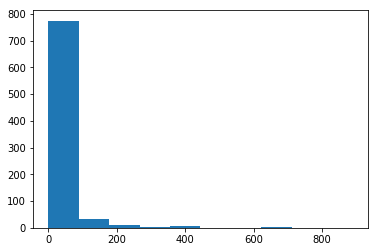

In [135]:
plt.hist(df['speed'].values)
#plt.plot(df['Dlong'].values)

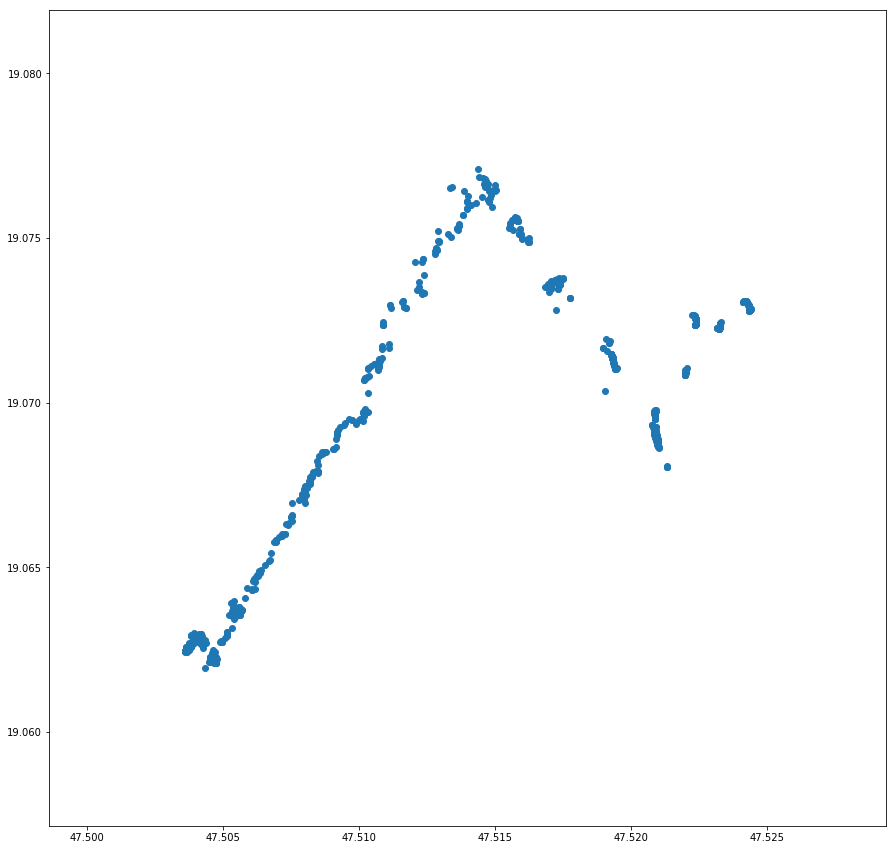

In [47]:
plt.figure(figsize=(15,15))
plt.scatter(df['lat'].values, df['long'].values)

In [11]:
min(df['lat'].values)

47.503591499999999